US Baby Names 1880-2010

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tnames = ['name', 'sex', 'births']
names1880 = pd.read_csv('names/yob1880.txt', header=None, names=tnames)
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [3]:
names1880.groupby(['sex'])['births'].sum() # number of people born this year by gender

sex
F     90994
M    110490
Name: births, dtype: int64

In [4]:
years = range(1880, 2023)
pieces = []
columns = ['name', 'sex', 'births']
for year in years:
    path = 'names/yob{}.txt'.format(year)
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame) # array containtn all info from txt
# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True) #ignore_index=True because we’re not interested in preserving the original row numbers
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [5]:
names.shape
names.groupby(['year', 'sex'])['births'].sum()

year  sex
1880  F        90994
      M       110490
1881  F        91953
      M       100737
1882  F       107847
              ...   
2020  M      1721588
2021  F      1635800
      M      1743913
2022  F      1628730
      M      1733166
Name: births, Length: 286, dtype: int64

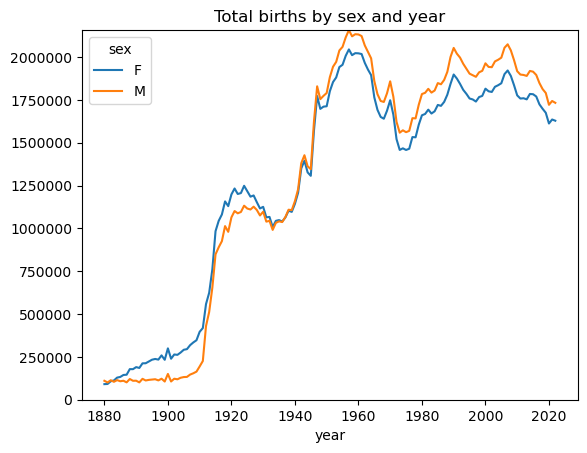

sex,F,M
year,,
1880,90994,110490
1881,91953,100737
1882,107847,113686
1883,112320,104625
1884,129019,114442


In [6]:
total_births = names.pivot_table(index='year', columns='sex', values='births', aggfunc="sum")
ax = total_births.plot(title='Total births by sex and year')
ax.set_ylim(0, total_births.max().max()) 
ax.ticklabel_format(style='plain', axis='y')
plt.show()
total_births.head()

In [7]:
def add_prop(group):
    births = group.births.astype(float)
    group['prop']=births/births.sum()
    return group
names=names.groupby(['year','sex'], as_index=False).apply(add_prop)
np.allclose(names.groupby(['year','sex']).prop.sum(),1) #np.allclose to check that the group sums are sufficiently close to (but perhaps not exactly equal to) 1
names.reset_index(inplace=True, drop=True) # drop=True parameter specifies that the current index should be discarded rather than being added as a new column in the dataframe.
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [8]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    # year (1880, 'F'), group (all col from df)
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


Analyzing Naming Trends

In [9]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']
boys.head()

,name,sex,births,year,prop
942,John,M,9655,1880,0.087383
943,William,M,9532,1880,0.086270
944,James,M,5927,1880,0.053643
945,Charles,M,5348,1880,0.048403
946,George,M,5126,1880,0.046393


In [10]:
wao = boys[boys['year'] == 2020].sort_values(by = "prop", ascending=False).reset_index(drop=True)
wa = wao[wao['name'].str.endswith('n')]
wao.head(), wa.head()

(      name sex  births  year      prop
 0     Liam   M   19828  2020  0.011517
 1     Noah   M   18407  2020  0.010692
 2   Oliver   M   14261  2020  0.008284
 3   Elijah   M   13172  2020  0.007651
 4  William   M   12643  2020  0.007344,
         name sex  births  year      prop
 6   Benjamin   M   12234  2020  0.007106
 10     Mason   M   10097  2020  0.005865
 12     Ethan   M    9533  2020  0.005537
 15     Logan   M    9140  2020  0.005309
 16   Jackson   M    9115  2020  0.005295)

In [11]:
total_births = top1000.pivot_table(index='year', columns='name', values='births', aggfunc='sum').fillna(0) # aggfunc='sum' must be string
total_births.head()


name,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aarna,Aaron,Aarush,Aarya,Aayan,...,Zola,Zollie,Zona,Zora,Zoya,Zula,Zuri,Zyair,Zyaire,Zyon
year,,,,,,,,,,,,,,,,,,,,,
1880,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,...,7.0,0.0,8.0,28.0,0.0,27.0,0.0,0.0,0.0,0.0
1881,0.0,0.0,0.0,0.0,0.0,0.0,94.0,0.0,0.0,0.0,...,10.0,0.0,9.0,21.0,0.0,27.0,0.0,0.0,0.0,0.0
1882,0.0,0.0,0.0,0.0,0.0,0.0,85.0,0.0,0.0,0.0,...,9.0,0.0,17.0,32.0,0.0,21.0,0.0,0.0,0.0,0.0
1883,0.0,0.0,0.0,0.0,0.0,0.0,105.0,0.0,0.0,0.0,...,10.0,0.0,11.0,35.0,0.0,25.0,0.0,0.0,0.0,0.0
1884,0.0,0.0,0.0,0.0,0.0,0.0,97.0,0.0,0.0,0.0,...,14.0,6.0,8.0,58.0,0.0,27.0,0.0,0.0,0.0,0.0


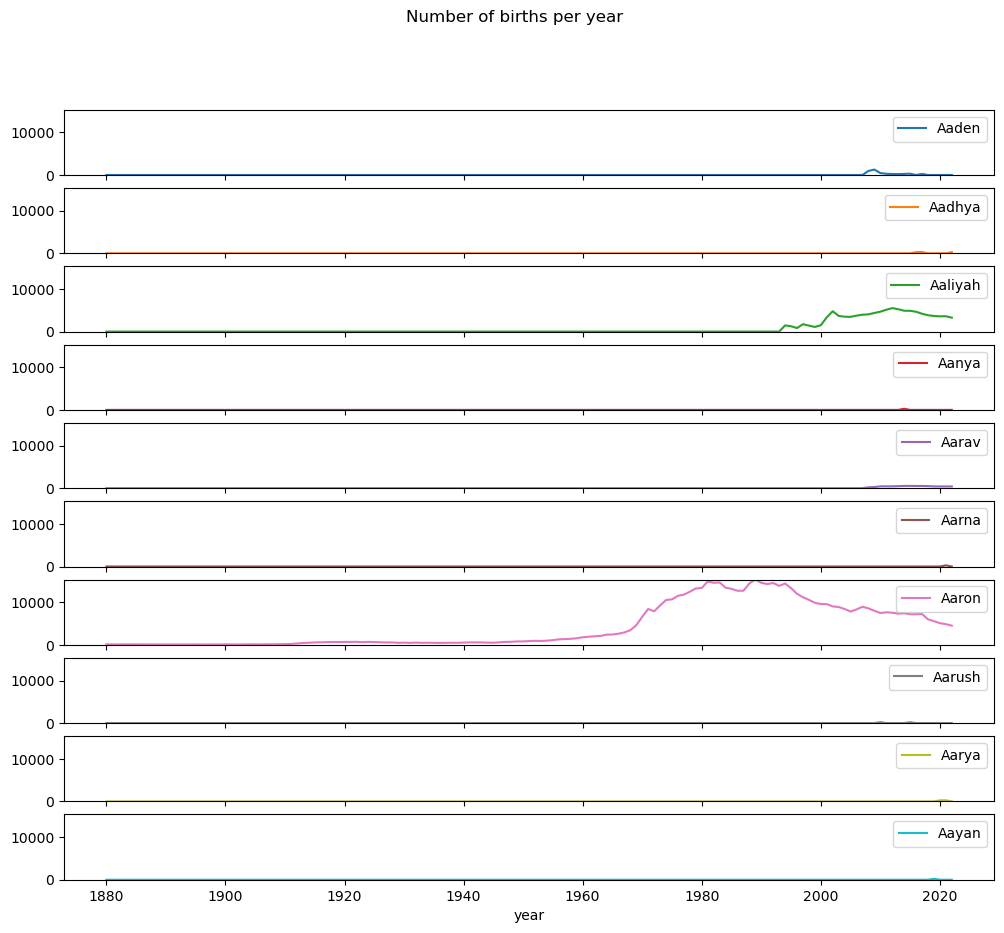

In [12]:
# plotting based on the slice
x = 20
y = 10
max_value= total_births.iloc[: , :y].values.max()
ax = total_births.iloc[: , :y].plot(subplots=True, figsize=(12,10), grid=False, title='Number of births per year', sharex=True, ylim=(0, max_value))

In [13]:
# showing the top 10
sorted_total_births = total_births[total_births.columns].sum().sort_values(ascending=False)
sorted_total_births # gives panda series from highest to lowest
filtered_total_births = total_births[sorted_total_births[0:10].index]
max_value= filtered_total_births.iloc[: , :].values.max()

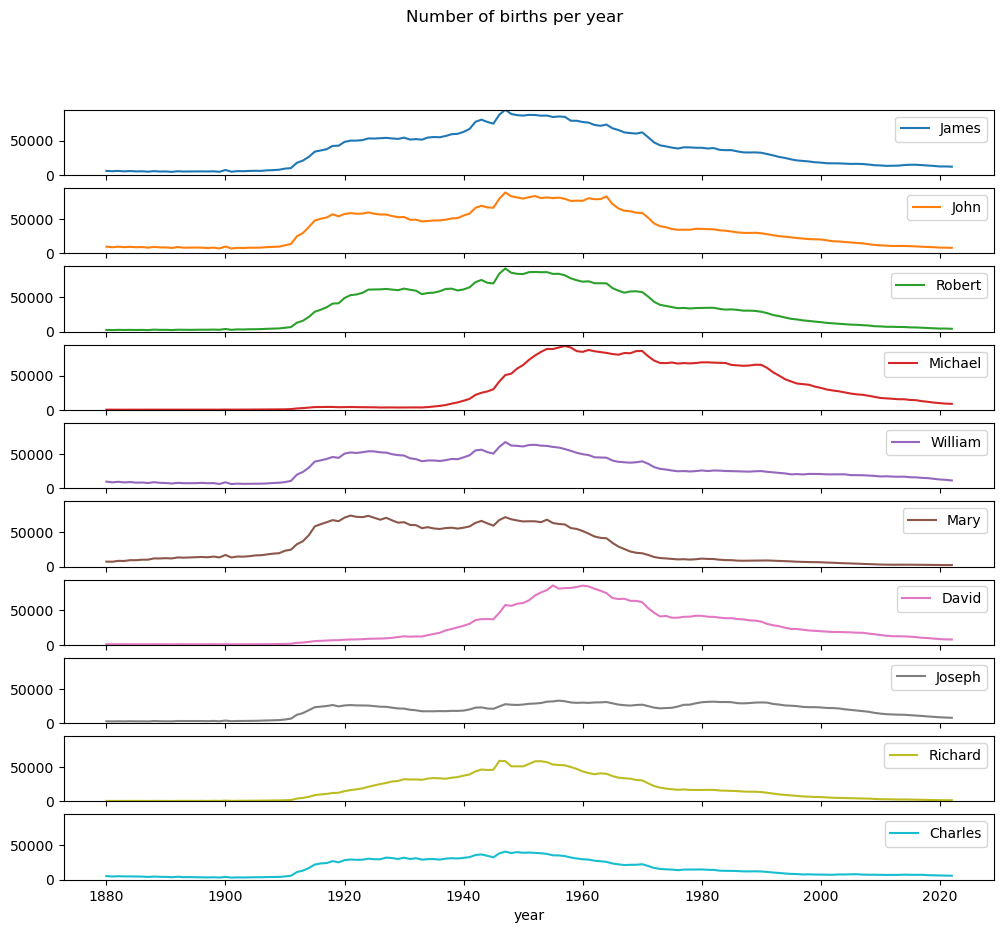

In [14]:
ax = filtered_total_births.iloc[: , :].plot(subplots=True, figsize=(12,10), grid=False, title='Number of births per year', sharex=True, ylim=(0, max_value))

array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>], dtype=object)

<Figure size 640x480 with 0 Axes>

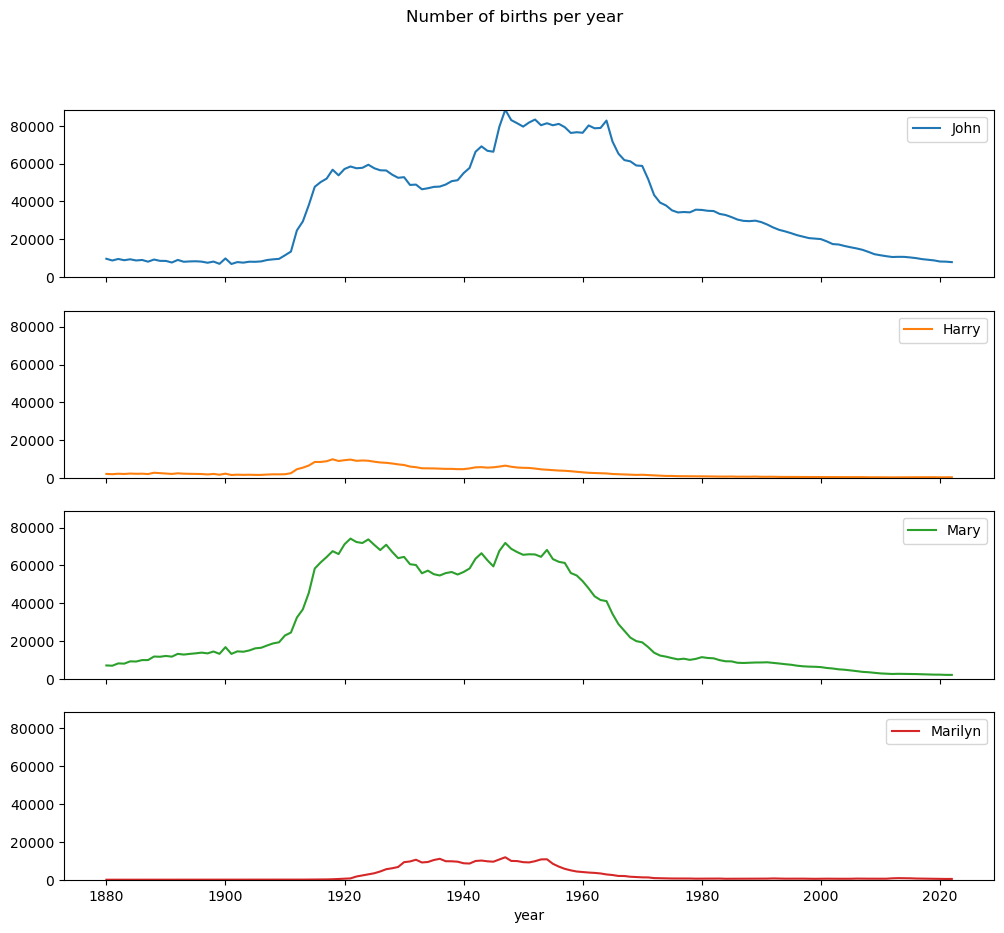

In [15]:
# plotting based on specific names
subest = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
max_value = subest.values.max()
plt.tight_layout()
subest.plot(subplots=True, figsize=(12,10), grid=False, title='Number of births per year', sharex=True, ylim=(0, max_value))

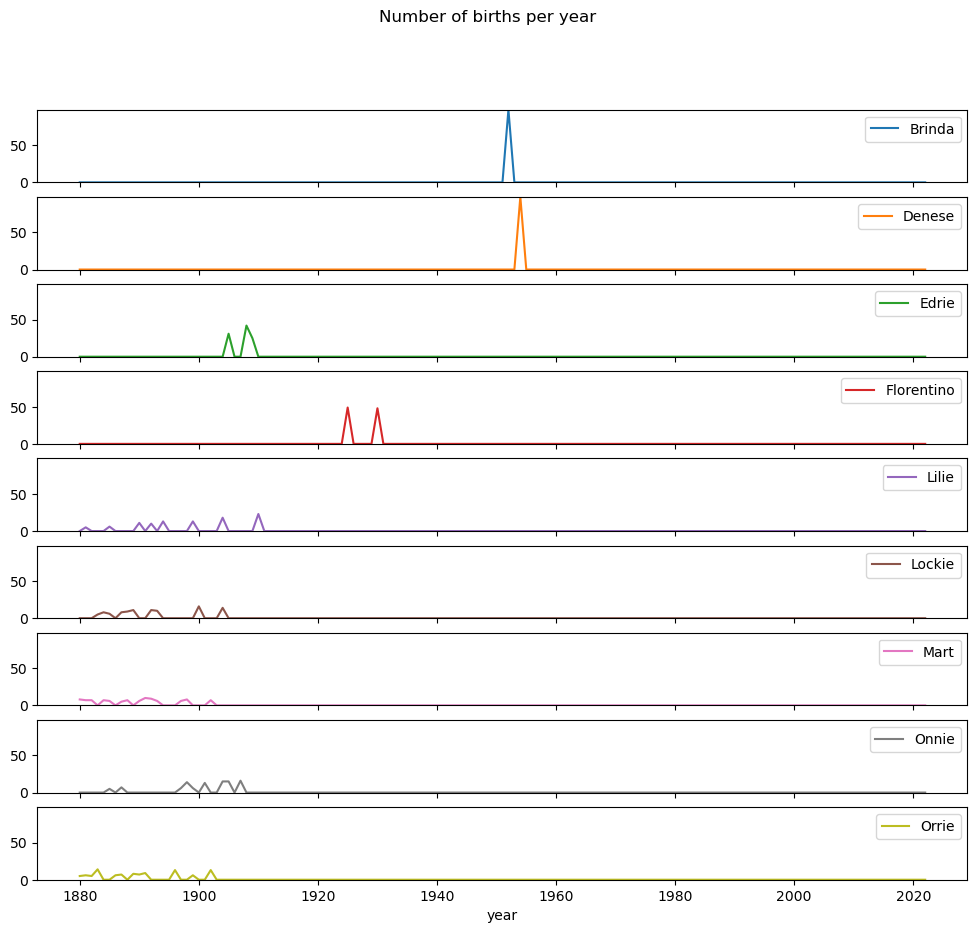

In [16]:
# plotting based on specific number of instances 
numb = 1000
filtered_total_births = total_births.loc[:, (total_births.sum(axis=0) < 100) & (total_births.sum(axis=0) > 95)]
filtered_total_births
# x = 20
# y = 10
max_value= filtered_total_births.iloc[: , :].values.max()
ax = filtered_total_births.iloc[: , :].plot(subplots=True, figsize=(12,10), grid=False, title='Number of births per year', sharex=True, ylim=(0, max_value))

Measuring the increase in naming diversity

<Axes: title={'center': 'Sum of top1000.prop by year and sex (name stability)'}, xlabel='year'>

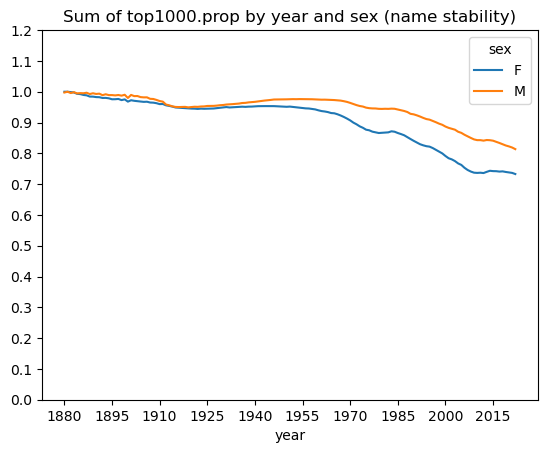

In [17]:
table = top1000.pivot_table(index='year', columns='sex', values='prop', aggfunc='sum')
table.plot(title='Sum of top1000.prop by year and sex (name stability)', yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2025, 15)) #np.linspace from 0 to 1.2 13 numbers 

In [18]:
df = boys[boys.year == 2022]
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum.searchsorted(0.5)

172

In [19]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.searchsorted(0.5) + 1

25

In [20]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1 # count starts from 1 instead of 0.
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex') 
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<Axes: title={'center': 'Number of popular names in top 50%'}, xlabel='year'>

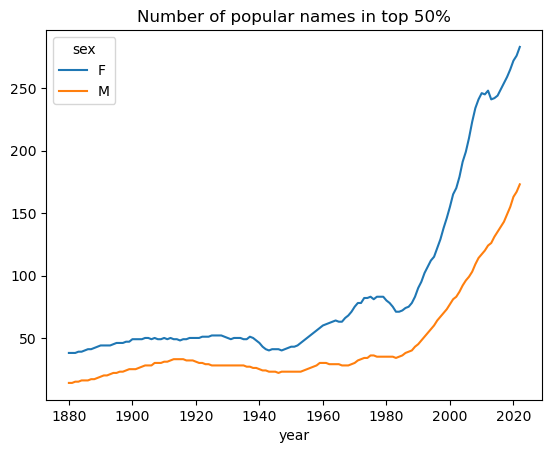

In [21]:
diversity.plot(title="Number of popular names in top 50%") # how many names make up 50 % of the cumulutive amount

The “Last letter” Revolution

In [22]:
get_last_letter = lambda x: x[-1]
last_letters = names.name.apply(get_last_letter) # same as .map(get_last_letter)
last_letters.name = 'last_letter'
last_letters

0          y
1          a
2          a
3          h
4          e
          ..
2085153    i
2085154    n
2085155    n
2085156    r
2085157    e
Name: last_letter, Length: 2085158, dtype: object

In [23]:
table = names.pivot_table(index= last_letters, columns= ['sex', 'year'], values= 'births', aggfunc="sum")
table.head()

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38329.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33381.0  34080.0  40399.0  41914.0  48089.0  49616.0  53883.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2013      2014      2015   
last_letter                             ...                                 
a            48942.0  59440.0  58631.0  ...   27478.0   28329.0   29068.0   
b                NaN      NaN      NaN  ...   33285.0   31426.0   29643.0   
c                NaN      NaN      NaN  ...   24099.0   23854.0   23164.0   
d             1027.0   1298.0   1374.0  ...   42732.0   44095.0   43833.0   
e            54353.0  66748.0  66662.0  ...  132378.0  132244.0  128753.0   

sex                                                                      \
year             2016      2017      2018      2019      2020      2021   
last_letter                                                               
a             29781.0   30343.0   30986.0   32553.0   33872.0   37436.0   
b             27031.0   24604.0   22747.0   20737.0   18106.0   17460.0   
c             22093.0   20602.0   19507.0   18621.0   16690.0   16095.0   
d             43069.0   42163.0   41880.0   40828.0   38939.0   39462.0   
e            126246.0  122176.0  120259.0  118867.0  116636.0  119913.0   

sex                    
year             2022  
last_letter            
a             39884.0  
b             16322.0  
c             15344.0  
d             39106.0  
e            119492.0  

[5 rows x 286 columns]

In [24]:
subtable = table.reindex(columns=[1910, 1980, 2020, 2022], level='year')
subtable.head()

sex                 F                                      M            \
year             1910      1980      2020      2022     1910      1980   
last_letter                                                              
a            108399.0  628143.0  615904.0  623470.0    977.0   42435.0   
b                 NaN      79.0     530.0     582.0    411.0   10149.0   
c                 5.0     404.0     898.0     772.0    482.0   30410.0   
d              6751.0    2026.0    3825.0    4240.0  22112.0  129509.0   
e            133599.0  310671.0  285726.0  288295.0  28665.0  112503.0   

sex                              
year             2020      2022  
last_letter                      
a             33872.0   39884.0  
b             18106.0   16322.0  
c             16690.0   15344.0  
d             38939.0   39106.0  
e            116636.0  119492.0

In [25]:
subtable.sum()

sex  year
F    1910     396503.0
     1980    1660434.0
     2020    1612393.0
     2022    1628730.0
M    1910     194209.0
     1980    1784405.0
     2020    1721588.0
     2022    1733166.0
dtype: float64

In [26]:
letter_prop = subtable / subtable.sum().astype(float)
letter_prop.head() # maing so that every year is 1 

sex                 F                                       M            \
year             1910      1980      2020      2022      1910      1980   
last_letter                                                               
a            0.273388  0.378300  0.381981  0.382795  0.005031  0.023781   
b                 NaN  0.000048  0.000329  0.000357  0.002116  0.005688   
c            0.000013  0.000243  0.000557  0.000474  0.002482  0.017042   
d            0.017026  0.001220  0.002372  0.002603  0.113857  0.072578   
e            0.336943  0.187102  0.177206  0.177006  0.147599  0.063048   

sex                              
year             2020      2022  
last_letter                      
a            0.019675  0.023012  
b            0.010517  0.009417  
c            0.009695  0.008853  
d            0.022618  0.022563  
e            0.067749  0.068944

<Axes: title={'center': 'Female'}, xlabel='last_letter'>

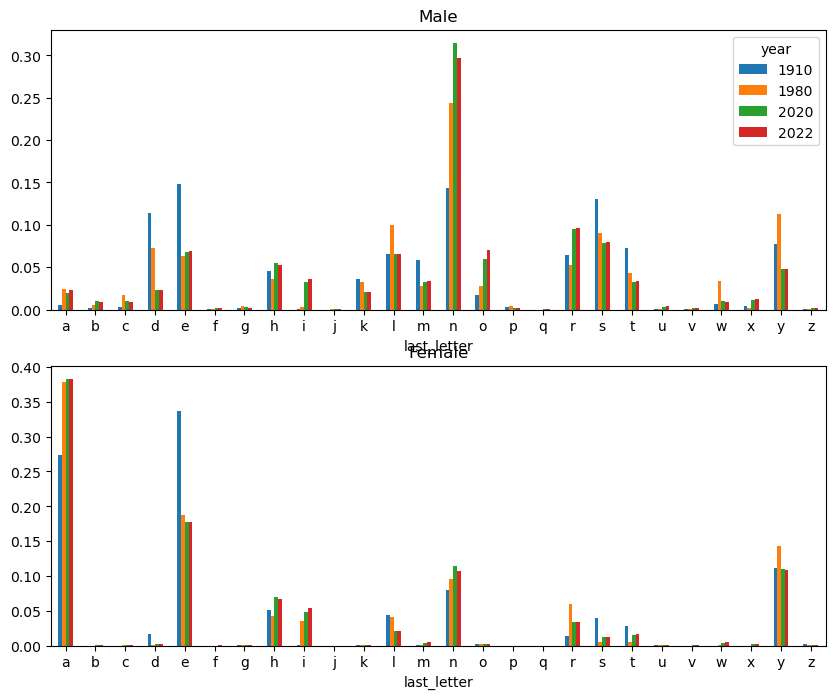

In [27]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
legend=False)

In [28]:
letter_prop = table / table.sum().astype(float)
letter_prop.iloc[0:5, 0:5]

sex                 F                                        
year             1880      1881      1882      1883      1884
last_letter                                                  
a            0.345583  0.343447  0.338776  0.341248  0.338555
b                 NaN       NaN       NaN       NaN       NaN
c                 NaN       NaN  0.000046  0.000045       NaN
d            0.006693  0.006601  0.006806  0.007212  0.007100
e            0.366848  0.370624  0.374595  0.373166  0.372728

In [29]:
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T #.T switches rows and columns
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083246,0.153221,0.077459
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408


<Axes: xlabel='year'>

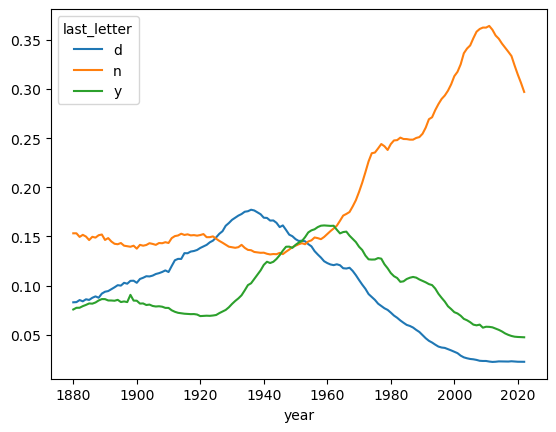

In [30]:
dny_ts.plot()

Boy names that became girl names (and vice versa)

In [31]:
all_names = top1000.name.unique() # unsorted list of all names
mask = np.array(['lesl' in x.lower() for x in all_names]) # returns array of true and false
lesley_like = all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [32]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee       993
Lesley     35039
Lesli        929
Leslie    380170
Lesly      11434
Name: births, dtype: int64

In [33]:
table = filtered.pivot_table(index= 'year', columns='sex', values='births', aggfunc='sum')
table.head()

sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0


In [34]:
table = table.div(table.sum(1), axis=0)
table.head()

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857


<Axes: xlabel='year'>

<Figure size 1000x600 with 0 Axes>

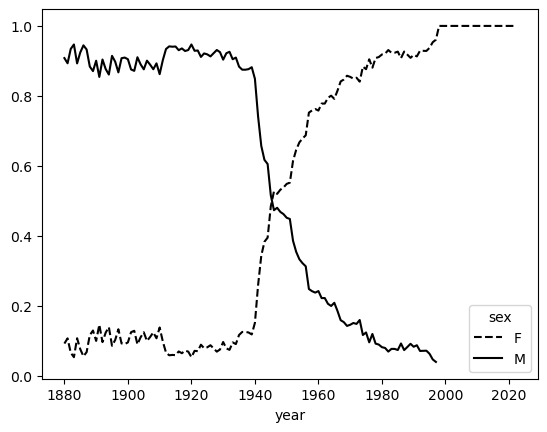

In [35]:
plt.figure(figsize=(10,6))
table.plot(style={'M': 'k-', 'F': 'k--'})